***
$$\mathbf{\text{Author: Kenneth Kusima}}$$<br>
$$\mathbf{\text{Python MicroKinetics Code}}$$<br>
$\mathbf{\text{Date: 08/22}}$<br>
***

In [1]:
from main import *
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

## Model:

# ***
$\mathbf{\text{Micro Kinetic Model for (an 11-Step Mechanism) CO Oxidation}}:$<br>
#### [Link to Relevant Paper](https://pubs.acs.org/doi/10.1021/cs500377j) 
***
$$\require{mhchem}$$       
---
Overall Reaction: 
$$ CO + \frac{1}{2} O_2 {\stackrel{\tiny{\textrm{Pt/Pd}}}{\rightleftharpoons}} CO_2 $$
$Ea = 80kJ{mol}^{-1}->120kJ{mol}^{-1}$
---
Note Reations in the Reaction Mechanism may be reversible or irreversible

Reaction 1:&emsp;Adsorption of CO / Desorption of CO* $\mathbf{\text{(FCC)}}$

$$ CO(g) + *_{FCC} \rightleftharpoons CO^{*}_{FCC} $$  <br> 

Reaction 2:&emsp;Adsorption of CO / Desorption of CO* $\mathbf{\text{(HCP)}}$

$$ CO(g) + *_{HCP} \rightleftharpoons CO^{*}_{HCP} $$  <br> 

Reaction 3:&emsp;Diffusion of ${CO}^*$

$$ {{CO}^{*}}_{FCC} + *_{HCP} \rightleftharpoons {{CO}^{*}}_{HCP} + *_{FCC}$$  <br>

Reaction 4:&emsp;Adsorption of $O_2$ / Desorption of $O_2^*$ $\mathbf{\text{(FCC)}}$

$$ {O_2}(g) + *_{FCC} \rightleftharpoons {{O_2}^{*}}_{FCC} $$  <br> 

Reaction 5:&emsp;Adsorption of $O_2$ / Desorption of $O_2^*$ $\mathbf{\text{(HCP)}}$

$$ {O_2}(g) + *_{HCP} \rightleftharpoons {{O_2}^{*}}_{HCP} $$  <br> 

Reaction 6:&emsp;Diffusion of ${O_2}^*$ 

$$ {{O_2}^{*}}_{FCC} + *_{HCP} \rightleftharpoons *_{FCC} + {{O_2}^{*}}_{HCP} $$  <br> 

Reaction 7:&emsp;Dissociation of ${O_2}^*$ / Recombination of O* $\mathbf{\text{(FCC)}}$

$$ {{O_2}^{*}}_{FCC} + *_{HCP} + *_{HCP} \rightleftharpoons {O^{*}}_{HCP} +  {O^{*}}_{HCP} + *_{FCC}$$  <br> 

Reaction 8:&emsp;Dissociation of ${O_2}^*$ / Recombination of O* $\mathbf{\text{(HCP)}}$

$$ {{O_2}^{*}}_{HCP} + *_{FCC} + *_{FCC} \rightleftharpoons {O^{*}}_{FCC} +  {O^{*}}_{FCC} + *_{HCP}$$  <br> 

Reaction 9:&emsp;Diffusion of ${O}^*$

$$ {{O}^{*}}_{FCC} + *_{HCP} \rightleftharpoons {O^{*}}_{HCP} + *_{FCC}$$  <br>

Reaction 10:&emsp;CO Oxidation Reaction  $\mathbf{\text{(FCC)}}$; (Implied Adsorption of $CO_2$)

$$ {{CO}^{*}}_{FCC} + {{O}^{*}}_{FCC} \rightleftharpoons {{CO}_2}(g) + *_{FCC} + *_{FCC} $$  <br> 

Reaction 11:&emsp;CO Oxidation Reaction  $\mathbf{\text{(HCP)}}$; (Implied Adsorption of $CO_2$)

$$ {{CO}^{*}}_{HCP} + {{O}^{*}}_{HCP} \rightleftharpoons {{CO}_2}(g) + *_{HCP} + *_{HCP} $$  <br> 

***
$\mathbf{\text{Modelling Proposed Reaction Mechanism}}:$<br>
***
${{k_i}^j= \textrm{Rate constant/coefficient for reaction i,}} \\  \hspace{0.5cm} \textrm{for j = {f,r} ; where f = forward reaction and r  = the reverse reaction} \\ r_i = \textrm{Rate of reaction for reaction i}$

${\theta_m = \textrm{Surface Coverage of species m}} \\ \sum_{m=1}^{N} \theta_{m} = 1 \\ $


### The Atomic/Species Matrix ($\nu$):


\begin{equation}
\
\nu=\begin{bmatrix}
          &   CO    &   O_2   &   CO_2  &  {CO^*}_{FCC} & {CO^*}_{HCP} & {O*}_{FCC}  &  {O*}_{HCP} & {O_2^*}_{FCC}  &  {O_2^*}_{HCP}    &   *_{FCC}  &  *_{HCP} \\
C         &   1     &   0     &   1     &      1        &    1         &      0      &      0      &     0        &    0    &   0     &   0\\
O         &   1     &   2     &   2     &      1        &    1         &     1       &      1      &     2        &    2    &   0     &   0\\
*_{FCC}   &   0     &   0     &   0     &      1        &    0         &     1       &      0      &     1        &    0    &   1     &   0\\
*_{HCP}   &   0     &   0     &   0     &      0        &    1         &     0       &      1      &     0        &    1    &   0     &   1\end{bmatrix}
\
\end{equation}

Atomic Matrix Size : (4x11)
### The Stoichiometric Matrix (A):

\begin{equation}
\
A=\begin{bmatrix}
    & P_{CO}  &P_{O_2} & P_{CO_2} & \theta_{CO,FCC} & \theta_{CO,HCP}& \theta_{O,FCC} &\theta_{O,HCP}& \theta_{O_2,FCC} &\theta_{O_2,HCP} &\theta_{*,FCC} &\theta_{*,HCP}\\
r_1 &  -1     &   0     &   0     &      1          &      0         &     0          &    0         &               0            &        0        &  -1           &  0\\
r_2 &  -1     &   0     &   0     &      0          &      1         &     0          &    0         &               0            &        0        &   0           & -1\\
r_3 &   0     &   0     &   0     &     -1          &      1         &     0          &    0         &               0            &        0        &   1           & -1\\  
r_4 &   0     &  -1     &   0     &      0          &      0         &     0          &    0         &               1            &        0        &  -1           &  0\\  
r_5 &   0     &  -1     &   0     &      0          &      0         &     0          &    0         &               0            &        1        &   0           & -1\\  
r_6 &   0     &   0     &   0     &      0          &      0         &     0          &    0         &              -1            &        1        &   1           & -1\\  
r_7 &   0     &   0     &   0     &      0          &      0         &     0          &    2         &              -1            &        0        &   1           & -2\\  
r_8 &   0     &   0     &   0     &      0          &      0         &     0          &    0         &               0            &       -1        &  -2           &  1\\  
r_9 &   0     &   0     &   0     &      0          &      0         &    -1          &    1         &               0            &        0        &   1           & -1\\  
r_{10}&   0   &   0     &   1     &     -1          &      0         &    -1          &    0         &               0            &        0        &   2           &  0\\
r_{11}&   0   &   0     &   1     &      0          &     -1         &     0          &   -1         &               0            &        0        &   0           &  2\end{bmatrix} 
\
\end{equation}

Stoichiometric Matrix Size : (11x11)

Note:

- For Mass to be conserved:
$$\mathbf{A}\mathbf{\nu = 0}$$

$i =$ species

$j =$ reaction

- To find the Rate of reaction of reaction j:

$$ r_j = k_{j,f} \prod_{i_f} P_{i,f} \theta_{i,f}^{A_{i,j}} - k_{j,r} \prod_{i_r} P_{i,r} \theta_{i,r}^{A_{i,j}}  $$

- To find the Rate of production of species i:
$$R_{\theta_i}=\frac{d\theta_i}{dt} = \sum_j A_{j,i} \cdot r_j $$

In [2]:
MKM1 = MKModel('Atomic.csv','Stoich.csv','Param.csv') #Defining the Model

Mass is conserved. 



In [3]:
MKM1.Atomic

,A\S,CO,O2,CO2,CO*_FCC,CO*_HCP,O*_FCC,O*_HCP,O2*_FCC,O2*_HCP,*_FCC,*_HCP
0,C,1,0,1,1,1,0,0,0,0,0,0
1,O,1,2,2,1,1,1,1,2,2,0,0
2,*_FCC,0,0,0,1,0,1,0,1,0,1,0
3,*_HCP,0,0,0,0,1,0,1,0,1,0,1


In [4]:
MKM1.Stoich #prints out the Stoichiometric Matrix Used

,r\S,P_CO,P_O2,P_CO2,"theta_CO,FCC","theta_CO,HCP","theta_O,FCC","theta_O,HCP","theta_O2,FCC","theta_O2,HCP","theta_*,FCC","theta_*,HCP"
0,r1,-1,0,0,1,0,0,0,0,0,-1,0
1,r2,-1,0,0,0,1,0,0,0,0,0,-1
2,r3,0,0,0,-1,1,0,0,0,0,1,-1
3,r4,0,-1,0,0,0,0,0,1,0,-1,0
4,r5,0,-1,0,0,0,0,0,0,1,0,-1
5,r6,0,0,0,0,0,0,0,-1,1,1,-1
6,r7,0,0,0,0,0,0,2,-1,0,1,-2
7,r8,0,0,0,0,0,2,0,0,-1,-2,1
8,r9,0,0,0,0,0,-1,1,0,0,1,-1
9,r10,0,0,1,-1,0,-1,0,0,0,2,0


In [26]:
MKM1.Param.iloc[5:27,1:3]

,Parameter,Values
5,k1f,2.490800e-01
6,k1r,7.470900e-02
7,k2f,2.490800e-01
8,k2r,3.691100e-02
9,k3f,4.308600e+09
10,k3r,2.128400e+09
11,k4f,7.768100e+02
12,k4r,1.352800e+08
13,k5f,7.768100e+02
14,k5r,8.957800e+09


In [5]:
MKM1.k

array([2.4908e-01, 7.4709e-02, 2.4908e-01, 3.6911e-02, 4.3086e+09,
       2.1284e+09, 7.7681e+02, 1.3528e+08, 7.7681e+02, 8.9578e+09,
       1.3041e+11, 2.3013e+09, 5.2988e+03, 9.2232e-11, 2.6671e+05,
       1.6764e-14, 3.8104e+06, 2.4642e+08, 9.3500e-01, 0.0000e+00,
       1.3455e+00, 0.0000e+00])

In [6]:
s = np.arange(4,13)
# for i in s:
#     MKM1.k[i] = MKM1.k[i]*0.002
# MKM1.k[20] = MKM1.k[20]* 1e5

In [8]:
MKM1.set_initial_coverages(init=[0,0,0,0,0,0,0.5,0.5]) #Sets the initial coverages of all the surface species (Note: Empty Sites are calculated Automatically. If no option is entered, default initial coverage is zero surface species coverage on the surface)
MKM1.set_rxnconditions(Pr=[2e-9,1e-5,1e-5]) #Sets the Pressures and Temperature as defined from the Param file. (Note: One can also enter them manually - See main.py for syntax)
MKM1.set_limits_of_integration(Ti=0,Tf=4e8)#Sets the reange of time used in integration

(0, 400000000.0)

<IPython.core.display.Javascript object>


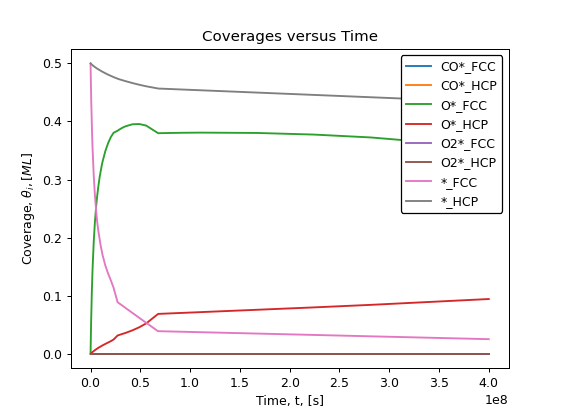

CPU times: user 6.27 s, sys: 67.4 ms, total: 6.33 s
Wall time: 6.33 s


In [9]:
%%time
sol1,solt1= MKM1.solve_coverage(plot=True) #Obtains the coverages(sol) with respect to time(solt) and plots them if plot=True (Note: Additional options can be set manually - See main.py for syntax)

<IPython.core.display.Javascript object>


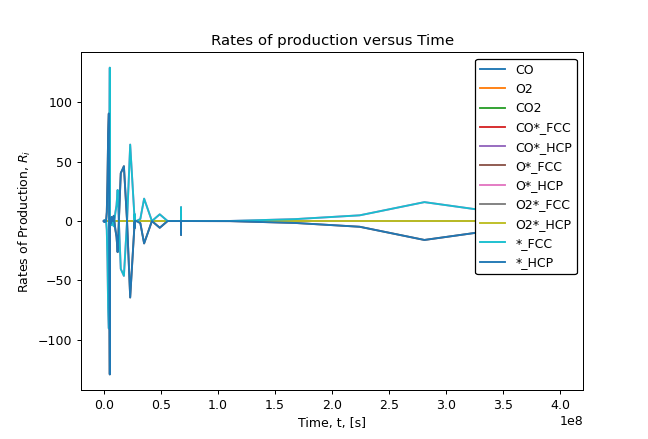

CPU times: user 6.07 s, sys: 30.4 ms, total: 6.1 s
Wall time: 6.08 s


In [10]:
%%time
sol2,solt2= MKM1.solve_rate_production(plot=True) #Obtains the coverages(sol) with respect to time(solt) and plots them if plot=True (Note: Additional options can be set manually - See main.py for syntax)

In [11]:
#Constant Pressures
P_O2 = 1e-5
P_CO2 = 0#10e-9

In [12]:
%%time
# MKM1.k = []
CO_pressure = np.linspace(0,4,15)*1e-7 #Vector of CO_pressures
CO_ss_covg = []
O_ss_covg = []
CO2_ss_rprod = []

blockPrint() #Blocs the corresponding prints of the following code. i.e the status of steady state calculations from being displayed
for i in np.arange(len(CO_pressure)):
    MKM1.set_rxnconditions(Pr=[CO_pressure[i],P_O2,CO_pressure[i]]) #Sets the Pressures and Temperature as defined from the Param file. (Note: One can also enter them manually - See main.py for syntax)  
    ss_covg = MKM1.get_SS_coverages()
    ss_prod = MKM1.get_SS_rates_production()
    CO_ss_covg.append(ss_covg[0]+ss_covg[1]) #Extracting steady state CO Coverage
    O_ss_covg.append(ss_covg[2]+ss_covg[3]) #Extracting steady state O Coverage
    CO2_ss_rprod.append(ss_prod[2]) #Extracting TOF of CO2

enablePrint() #Re-enables priniting

CPU times: user 6min 37s, sys: 1.07 s, total: 6min 38s
Wall time: 6min 37s


<IPython.core.display.Javascript object>


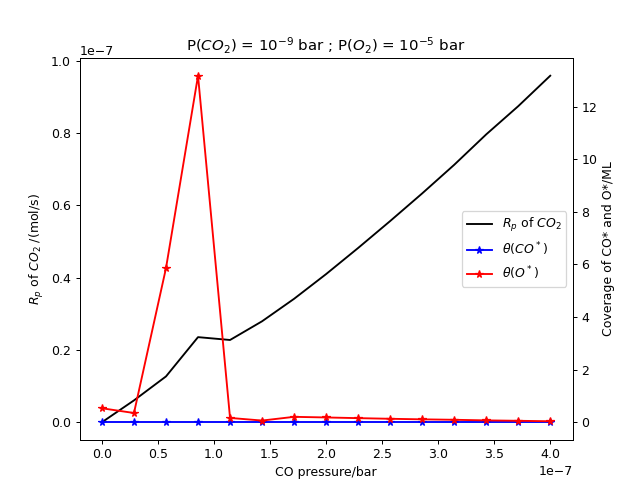

In [13]:
fig,ax = plt.subplots()
lns1 = ax.plot(CO_pressure,CO2_ss_rprod,'k-',label=r'$R_p$ of ${CO}_2$')
ax.set_xlabel('CO pressure/bar')
ax.set_ylabel(r'$R_p$ of $CO_2$ /(mol/s)')
ax.set_title(r'P($CO_2$) = $10^{-9}$ bar ; P($O_2$) = $10^{-5}$ bar')
ax.legend(loc='right')

ax2 = ax.twinx()
lns2 = ax2.plot(CO_pressure,CO_ss_covg,'b*-',label=r'$\theta(CO^*)$')
lns3 = ax2.plot(CO_pressure,O_ss_covg,'r*-',label=r'$\theta(O^*)$')
ax2.set_ylabel('Coverage of CO* and O*/ML')

#For legend purposes:
lns = lns1+lns2+lns3
labs = [l.get_label() for l in lns]
ax.legend(lns,labs,loc='center right')
# ax.set_xscale('log')

plt.show()


In [ ]:
print(MKM1.get_SS_coverages()) #Printing the Steady state coverages (Note: Additional options can be set manually - See main.py for syntax)

Other possible features that weren't used (but also work) include:
- solve_rate_reaction(tf=None,initial_coverage=[],plot=False)
- solve_rate_production(tf=None,initial_coverage=[],plot=False)
- get_SS_rates_reaction(tf=None)
- get_SS_rates_production(tf=None)

### Dynamic Pressure Modulation

<IPython.core.display.Javascript object>


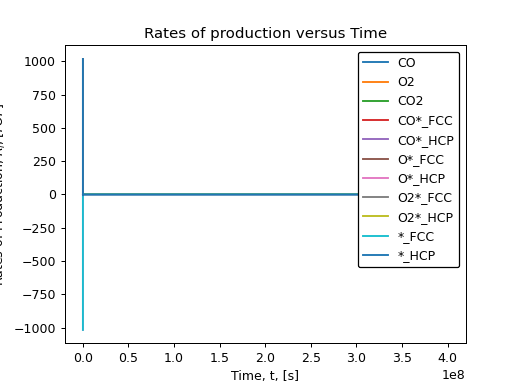

In [36]:
sol2,solt2 = MKM1.dynamic_transient_rates_production(State1=[0.2e-9,2e-6,1e-8],State2=[2e-9,2e-6,1e-8],plot=True) #Calculate the transient response from State 1 to State 2. State conditions (Pressures) can be entered as seen in this line, or if not entered, a prompt will appear asking for the relevant state conditions

Other possible features that weren't used (but also work) include:
- dynamic_transient_rates_reaction(State1=[],State2=[],plot=False)
- dynamic_transient_rates_production(State1=[],State2=[],plot=False)

### Including Coverage Dependance (Making use of the MKModel_wCD subpackage)

In [8]:
MKM1CD = MKModel_wCD('Atomic_1.csv','Stoich_1.csv','Param_1.csv') #Defining the Model

Mass is conserved. 



In [9]:
MKM1CD.set_initial_coverages(init=[0,0,0]) #Sets the initial coverages of all the surface species (Note: Empty Sites are calculated Automatically. If no option is entered, default initial coverage is zero surface species coverage on the surface)
MKM1CD.set_rxnconditions() #Sets the Pressures and Temperature as defined from the Param file. (Note: One can also enter them manually - See main.py for syntax)
MKM1CD.set_limits_of_integration(Ti=0,Tf=6e6)#Sets the reange of time used in integration

(0, 6000000.0)

ODE Solver Converged


<IPython.core.display.Javascript object>


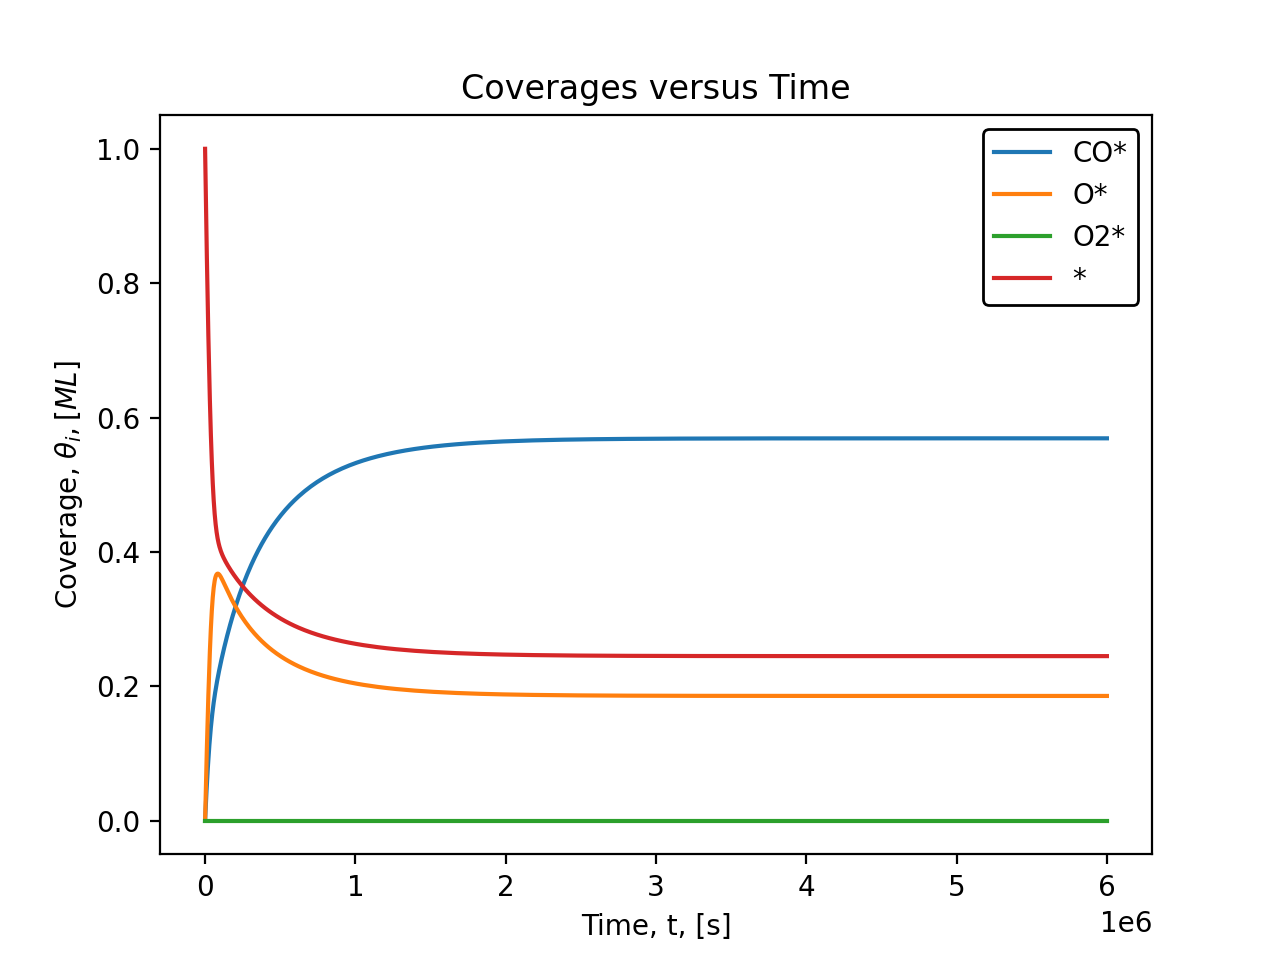

In [10]:
sol1CD,solt1CD= MKM1CD.solve_coverage(plot=True) #Obtains the coverages(sol) with respect to time(solt) and plots them if plot=True (Note: Additional options can be set manually - See main.py for syntax)

In [11]:
print(MKM1CD.get_SS_coverages()) #Printing the Steady state coverages (Note: Additional options can be set manually - See main.py for syntax)

ODE Solver Converged
Steady State Reached
[0.5691540527574265 0.18579226355119352 4.91753708047329e-12
 0.24505368368733213]


The same additional features also exist in this subpackage

### Dynamic Pressure Modulation

In [12]:
MKM1CD.set_limits_of_integration(Ti=0,Tf=0.4e6) #Changing the time interval so as to view the plot better

(0, 400000.0)

ODE Solver Converged
Steady State Reached
ODE Solver Converged


<IPython.core.display.Javascript object>


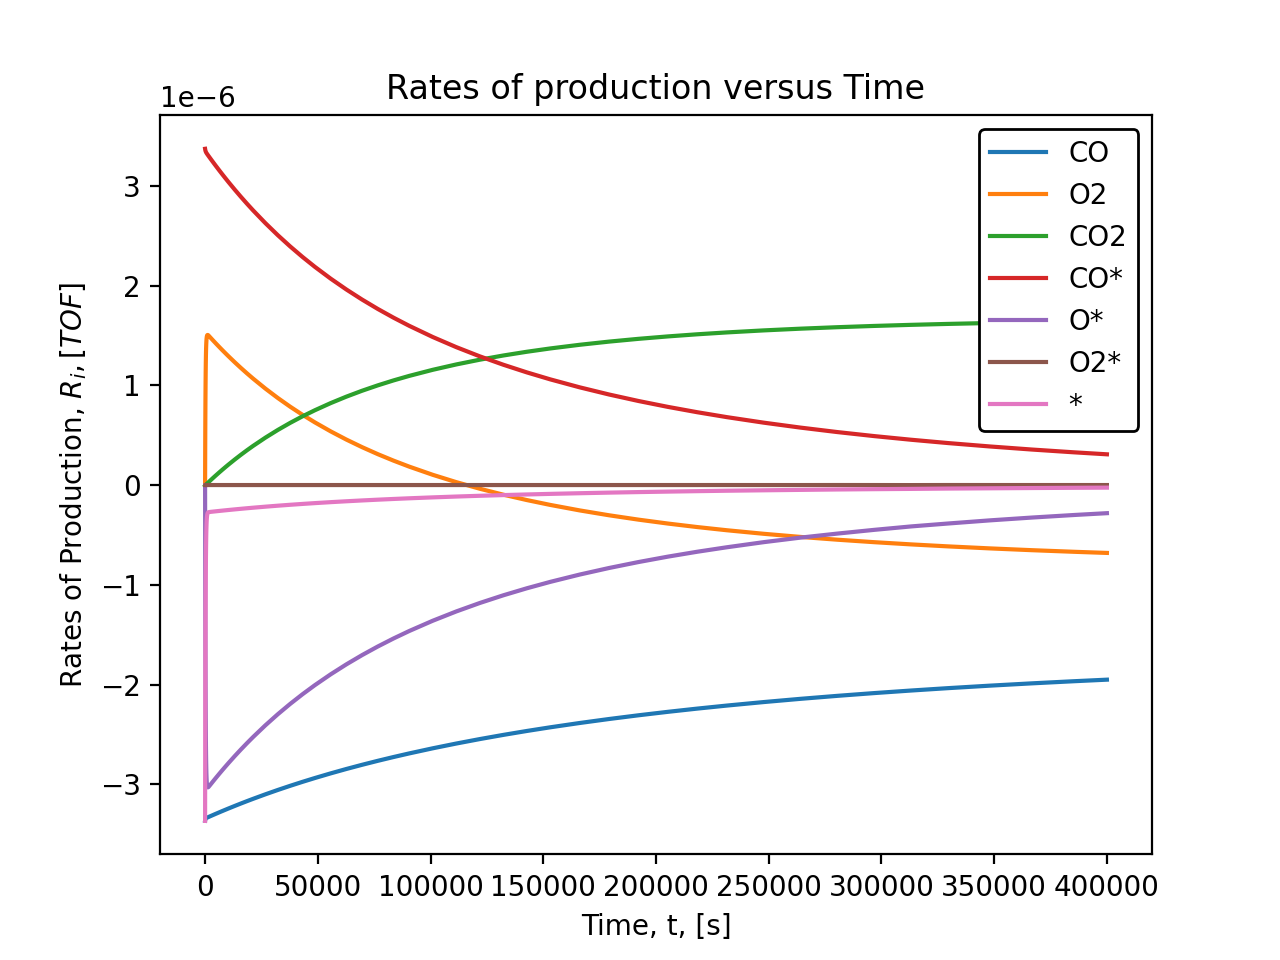

In [13]:
sol2CD,solt2CD = MKM1CD.dynamic_transient_rates_production(State1=[0.2e-9,2e-6,1e-8],State2=[0.8e-5,2e-6,1e-8],plot=True) #Calculate the transient response from State 1 to State 2. State conditions (Pressures) can be entered as seen in this line, or if not entered, a prompt will appear asking for the relevant state conditions

# ----------------------------------------------------------------------------------------

# Fitting:

## Without CD

### Model 1:

Mass is conserved. 


 Initial guess: 

-> Rate Constants:
 [1.e+00 1.e-09 1.e+02 1.e+05 1.e+08 1.e-02 1.e-06 1.e+02]

 Final predictions: 

-> Rate Constants:
 [1.99997586e+00 6.64998401e-09 2.30999980e+02 4.00788517e+04
 2.13637132e+08 2.13999430e-02 2.84999988e-06 5.00000043e+02]


<IPython.core.display.Javascript object>


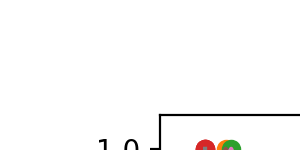

CPU times: user 9min 25s, sys: 36.4 s, total: 10min 1s
Wall time: 8min 5s


In [31]:
%%time 
#Fitting for Model 1: (without CD) #using curve_fit
fit1_a = Fitting('coverages_1_nCD.csv','Atomic_1.csv','Stoich_1.csv','Param_1_Guess.csv',CovgDep=False) #covgdep = Allowing for coverage dependance to be considered in the fit
t1_a,covg1_a,fits1_a = fit1_a.fitting_rate_param(option='cf',plot=True) #cf stands for curve fit

Mass is conserved. 


 Initial guess: 

-> Rate Constants:
 [1.e+00 1.e-09 1.e+02 1.e+05 1.e+08 1.e-02 1.e-06 1.e+02]

 Final predictions: 

-> Rate Constants:
 [6.76961248e+00 2.78633582e-07 9.87461934e+01 1.00000000e+05
 1.00000000e+08 1.00000000e+01 1.07629206e-07 1.03907262e+02]


<IPython.core.display.Javascript object>


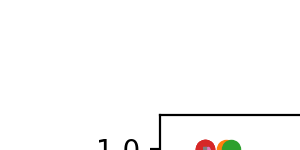

CPU times: user 37.1 s, sys: 70.8 ms, total: 37.1 s
Wall time: 37.1 s


In [32]:
%%time 
#Fitting for Model 1: (without CD) #using function minizer
fit1_b = Fitting('coverages_1_nCD.csv','Atomic_1.csv','Stoich_1.csv','Param_1_Guess.csv',CovgDep=False) #covgdep = Allowing for coverage dependance to be considered in the fit
t1_b,covg1_b,fits1_b = fit1_b.fitting_rate_param(option='min',plot=True) #min stands for minimize